# EfficientNet Implementation   - EfficientNet- B2

## Training a Custom  Model from scratch

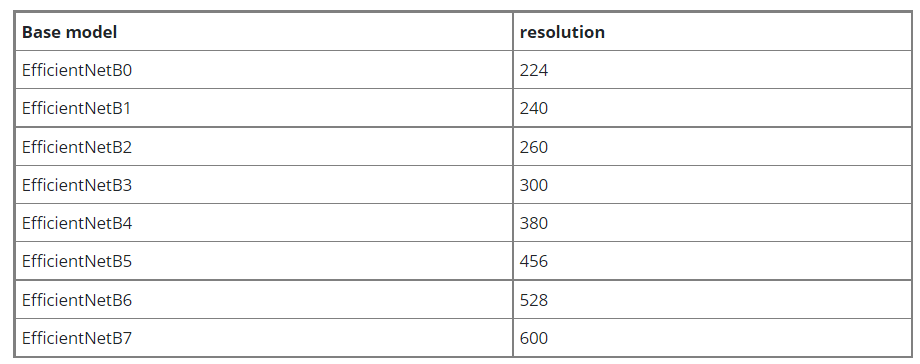

# Data Pre Processing

In [1]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('DikeDatasetgray')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['benign', 'malware']
Types of classes labels found:  2


In [2]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('DikeDatasetgray' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [3]:

# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

   Labels                                              image
0  benign  dataset_path/benign/002ce0d28ec990aadbbc89df45...
1  benign  dataset_path/benign/003851675800dc05cdac1baa84...
2  benign  dataset_path/benign/00eea85752664955047caad7d6...
3  benign  dataset_path/benign/0111bddac92a792c7b2ee3ab77...
4  benign  dataset_path/benign/016584e586de67b725ac1e3974...
       Labels                                              image
1977  malware  dataset_path/malware/4b769d1f64649bcbc2b649ac3...
1978  malware  dataset_path/malware/4b77ff5cf7a0bad9645c0d498...
1979  malware  dataset_path/malware/4b78f6ca78919678159568f9c...
1980  malware  dataset_path/malware/4b802fc53050277a253c0eb05...
1981  malware  dataset_path/malware/4b88ecbf6a338c45897915125...


In [4]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  1982
malware    1000
benign      982
Name: Labels, dtype: int64


In [5]:
import cv2
path = 'DikeDatasetgray/'
dataset_path = os.listdir('DikeDatasetgray')

im_size = 260

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
#     print(data_path)
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        ul_data_path = data_path + '/' + f
        img = cv2.imread(ul_data_path)
#         print(ul_data_path)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [6]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(1982, 260, 260, 3)

In [7]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['benign' 'benign' 'benign' ... 'malware' 'malware' 'malware']
[0 0 0 ... 1 1 1]


In [8]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[5:])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.3, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(1387, 260, 260, 3)
(1387, 2)
(595, 260, 260, 3)
(595, 2)



# EfficientNet Implementation :



In [10]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB2

NUM_CLASSES = 2
IMG_SIZE = 260
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB2(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [11]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, batch_size=10, epochs=30, verbose=2)

model.save("B2_model.h5")


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 260, 260, 3)]     0         
                                                                 
 efficientnetb2 (Functional)  (None, 2)                7771387   
                                                                 
Total params: 7,771,387
Trainable params: 7,703,812
Non-trainable params: 67,575
_________________________________________________________________
Epoch 1/30
139/139 - 56s - loss: 2.3328 - accuracy: 0.7058 - 56s/epoch - 403ms/step
Epoch 2/30
139/139 - 31s - loss: 0.5081 - accuracy: 0.8125 - 31s/epoch - 220ms/step
Epoch 3/30
139/139 - 30s - loss: 0.5252 - accuracy: 0.8587 - 30s/epoch - 213ms/step
Epoch 4/30
139/139 - 32s - loss: 0.3996 - accuracy: 0.8731 - 32s/epoch - 227ms/step
Epoch 5/30
139/139 - 29s - loss: 0.3315 - accuracy: 0.9221 - 29s/epoch - 211ms/step
Epoch 6/30
139/139 - 3

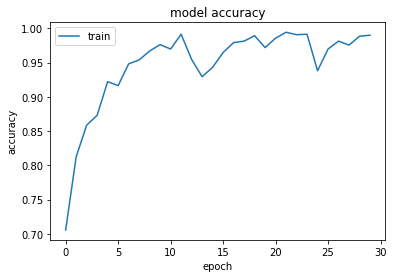

In [12]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [13]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

19/19 [==============================] - 8s 204ms/step - loss: 0.2180 - accuracy: 0.9563
Loss = 0.21799175441265106
Test Accuracy = 0.9563025236129761


# Testing Efficient Model On Unseen data

Input image shape: (1, 260, 260, 3)


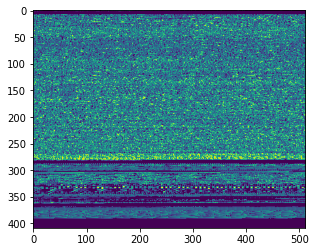

In [29]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = 'testM3.png'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (260, 260))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [31]:
preds=new_model.predict(x)
preds     # probabilities for being in each of the 3 classes

1/1 [==============================] - 2s 2s/step


array([[1., 0.]], dtype=float32)

In [30]:
new_model = tf.keras.models.load_model('B2_model.h5')

# Show the model architecture
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 260, 260, 3)]     0         
                                                                 
 efficientnetb2 (Functional)  (None, 2)                7771387   
                                                                 
Total params: 7,771,387
Trainable params: 7,703,812
Non-trainable params: 67,575
_________________________________________________________________


In [18]:
loss, acc = new_model.evaluate(test_x, test_y, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

19/19 - 41s - loss: 0.2180 - accuracy: 0.9563 - 41s/epoch - 2s/step
Restored model, accuracy: 95.63%


In [ ]:

# Cuda and cudnn is installed for this tensorflow version. So we can see GPU is enabled
# tf.config.experimental.list_physical_devices()

In [ ]:
# %%timeit -n1 -r1 
# with tf.device('/CPU:0'):
#     cpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
#     cpu_performance

In [ ]:

# %%timeit -n1 -r1 
# with tf.device('/GPU:0'):
#     gpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
#     gpu_performance

In [ ]:
# CPU completed the training in 7 min 53 Seconds and GPU did that training in 25.6 seconds